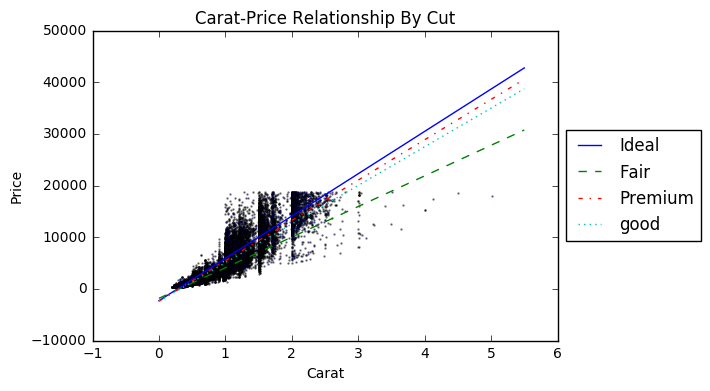

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170418


In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul  4 15:25:31 2017

@author: luxihan
"""

import pandas as pd
from pydataset import data
import numpy as np
import matplotlib.pyplot as plt

diamonds = data('diamonds')

cut_group = diamonds.groupby('cut')
cut_group_id = cut_group.get_group('Ideal')
cut_group_pre = cut_group.get_group('Premium')
cut_group_good = cut_group.get_group('Good')
cut_group_vg = cut_group.get_group('Very Good')
cut_group_fr = cut_group.get_group('Fair')

carat = np.linspace(0, 5.5, 200)
m, b = np.polyfit(cut_group_id.carat, cut_group_id.price, 1)
plt.plot(carat, m * carat + b, label = 'Ideal')
plt.scatter(cut_group_id.carat, cut_group_id.price, s = 0.5, alpha = 0.5,\
            label = None)

m, b = np.polyfit(cut_group_fr.carat, cut_group_fr.price, 1)
plt.plot(carat, m * carat + b, label = 'Fair', ls = '--')
plt.scatter(cut_group_fr.carat, cut_group_fr.price, s = 0.5, alpha = 0.5, \
            label = None)

m, b = np.polyfit(cut_group_pre.carat, cut_group_pre.price, 1)
plt.plot(carat, m * carat + b, label = 'Premium', ls = '-.')
plt.scatter(cut_group_pre.carat, cut_group_pre.price, s = 0.5, alpha = 0.5, \
            label = None)

m, b = np.polyfit(cut_group_good.carat, cut_group_good.price, 1)
plt.plot(carat, m * carat + b, label = 'good', ls = ':')
plt.scatter(cut_group_good.carat, cut_group_good.price, s = 0.5, alpha = 0.5, \
            label = None)

#m, b = np.polyfit(cut_group_vg.carat, cut_group_vg.price, 1)
#plt.plot(carat, m * carat + b, label = 'Premium')
#plt.scatter(cut_group_vg.carat, cut_group_vg.price, s = 0.5, alpha = 0.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Carat-Price Relationship By Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


#problem 2
titanic = pd.read_csv('titanic.csv')
titanic.loc[pd.isnull(titanic['Age']), 'Age'] = titanic['Age'].mean()
titanic = titanic.loc[:, ['Pclass', 'Survived', 'Sex', 'Age', 'Fare', 'Embarked']]
titanic = titanic.dropna(axis = 0, how = 'any')

titanic.groupby('Embarked').mean()['Survived']
titanic.pivot_table('Survived', index = 'Sex', columns = 'Embarked')



In [5]:
titanic.pivot_table('Survived', index = 'Pclass', columns = 'Embarked')

Embarked,C,Q,S
Pclass,,,
1.0,0.687943,0.666667,0.559322
2.0,0.571429,0.285714,0.417355
3.0,0.366337,0.353982,0.210526


In [6]:
titanic.pivot_table('Survived', index = 'Pclass', columns = 'Embarked', \
                    aggfunc = 'count')

Embarked,C,Q,S
Pclass,,,
1.0,141,3,177
2.0,28,7,242
3.0,101,113,494


Now we can see that the embarked town does have relationship with survival rate. Part of the reason why this is the case is that people from Cherbourg have the largest proportion of first class. Southampton has the second largest proportion of people who are first class. But as we take a closer look at the pivot table of Pclass and embarked town, then we can see that Cherbourg has higher survival rate for each class. Then there are other reason why embarked town affects survival rate.